In [19]:
##importing the necessary modules and libraries
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Activation, Dropout
import os
import numpy as np

In [2]:
#loading the cifar10 data from keras datasets modeule
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

In [3]:
#checking the shape of the dataset in train and test 
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
##there are 50000 train data points and 10k test data points. each image is of shape 32X32X3. 

In [15]:
#to find the number of classes in the data. 
num_classes = len(np.unique(y_train))
print(num_classes)
##there are 10 unique classes in the cifar 10 data

10


In [16]:
#convert the target variable to categorical using keras utils
y_train = keras.utils.to_categorical(y_train, 10 )
y_test = keras.utils.to_categorical(y_test,10)

In [18]:
y_train
#the target is converted to categorical/one hot encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
##the train and test data are normalised by dividing it by 255 (highest value).
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [26]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(64,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(128,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())



model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W1227 11:27:52.150876 140122733987648 deprecation_wrapper.py:119] From /home/jayateertha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1227 11:27:53.075648 140122733987648 deprecation_wrapper.py:119] From /home/jayateertha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1227 11:27:53.488453 140122733987648 deprecation_wrapper.py:119] From /home/jayateertha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1227 11:27:54.201789 140122733987648 deprecation_wrapper.py:119] From /home/jayateertha/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 64)       

In [28]:
result = model.fit(x_train, y_train,batch_size=32,epochs=30, validation_data=(x_test,y_test))


W1227 11:28:30.048339 140122733987648 deprecation.py:323] From /home/jayateertha/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 142s 3ms/step - loss: 1.6186 - acc: 0.3950 - val_loss: 1.2638 - val_acc: 0.5504
Epoch 2/30
50000/50000 [==============================] - 140s 3ms/step - loss: 1.1742 - acc: 0.5795 - val_loss: 1.0186 - val_acc: 0.6351
Epoch 3/30
50000/50000 [==============================] - 140s 3ms/step - loss: 0.9935 - acc: 0.6514 - val_loss: 0.9142 - val_acc: 0.6841
Epoch 4/30
50000/50000 [==============================] - 134s 3ms/step - loss: 0.8751 - acc: 0.6935 - val_loss: 0.8257 - val_acc: 0.7167
Epoch 5/30
50000/50000 [==============================] - 126s 3ms/step - loss: 0.7933 - acc: 0.7228 - val_loss: 0.8099 - val_acc: 0.7214
Epoch 6/30
50000/50000 [==============================] - 122s 2ms/step - loss: 0.7272 - acc: 0.7449 - val_loss: 0.7508 - val_acc: 0.7402
Epoch 7/30
50000/50000 [==============================] - 136s 3ms/step - loss: 0.6845 - acc: 0.7629 - val_loss: 0.7264 - 

In [32]:
x = np.arange(1,30)
y1 = result.history['acc']
y2 = result.history['val_acc']
y3 = result.history['loss']
y4 = result.history['val_loss']

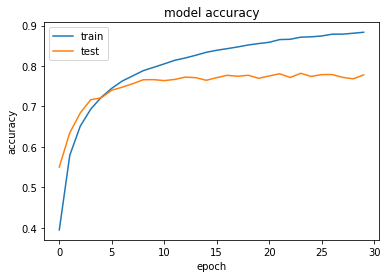

In [33]:
import matplotlib.pyplot as plt
plt.plot(y1)
plt.plot(y2)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

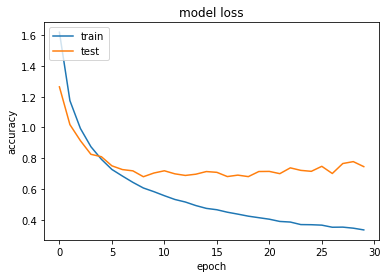

In [34]:
plt.plot(y3)
plt.plot(y4)
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 10s 963us/step
Test loss: 0.7455772275447845
Test accuracy: 0.778


In [ ]:
##test accuracy is about 78%